DECISION TREES

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# READ THE DATASET
dataset=pd.read_csv('kyphosis.csv')

In [3]:
dataset.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


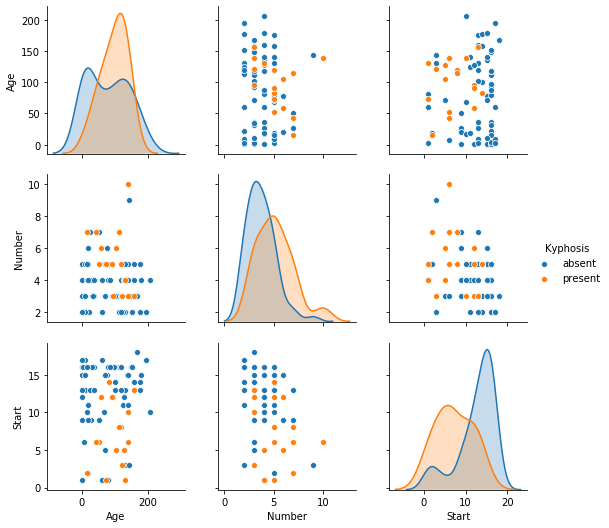

In [4]:
# EDA ON KYPHOSIS DATA
sns.pairplot(dataset,hue='Kyphosis')

In [5]:
# DIVIDE DATASET INTO X AND Y

x=dataset.drop('Kyphosis',axis=1)
y=dataset['Kyphosis']




# SPLITTING THE DATASET INTI TRAIN AND TEST
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.head()
y_train.head()

66    absent
41    absent
3     absent
69    absent
7     absent
Name: Kyphosis, dtype: object

BUILDING DECISION TREES


In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
# MODEL PREDICTION AND EVALUATION

y_predict=dtree.predict(x_test)
y_predict

array(['absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'present', 'present'], dtype=object)

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
classificationreport=classification_report(y_test,y_predict)

In [9]:
cm

array([[10,  2],
       [ 2,  3]], dtype=int64)

In [10]:
accuracy

0.7647058823529411

In [11]:
print(classificationreport)

              precision    recall  f1-score   support

      absent       0.83      0.83      0.83        12
     present       0.60      0.60      0.60         5

    accuracy                           0.76        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.76      0.76      0.76        17



TREE VISUALIZATION

In [17]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

C:\Users\UER\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [18]:
features=list(dataset.columns[1:])
features


['Age', 'Number', 'Start']

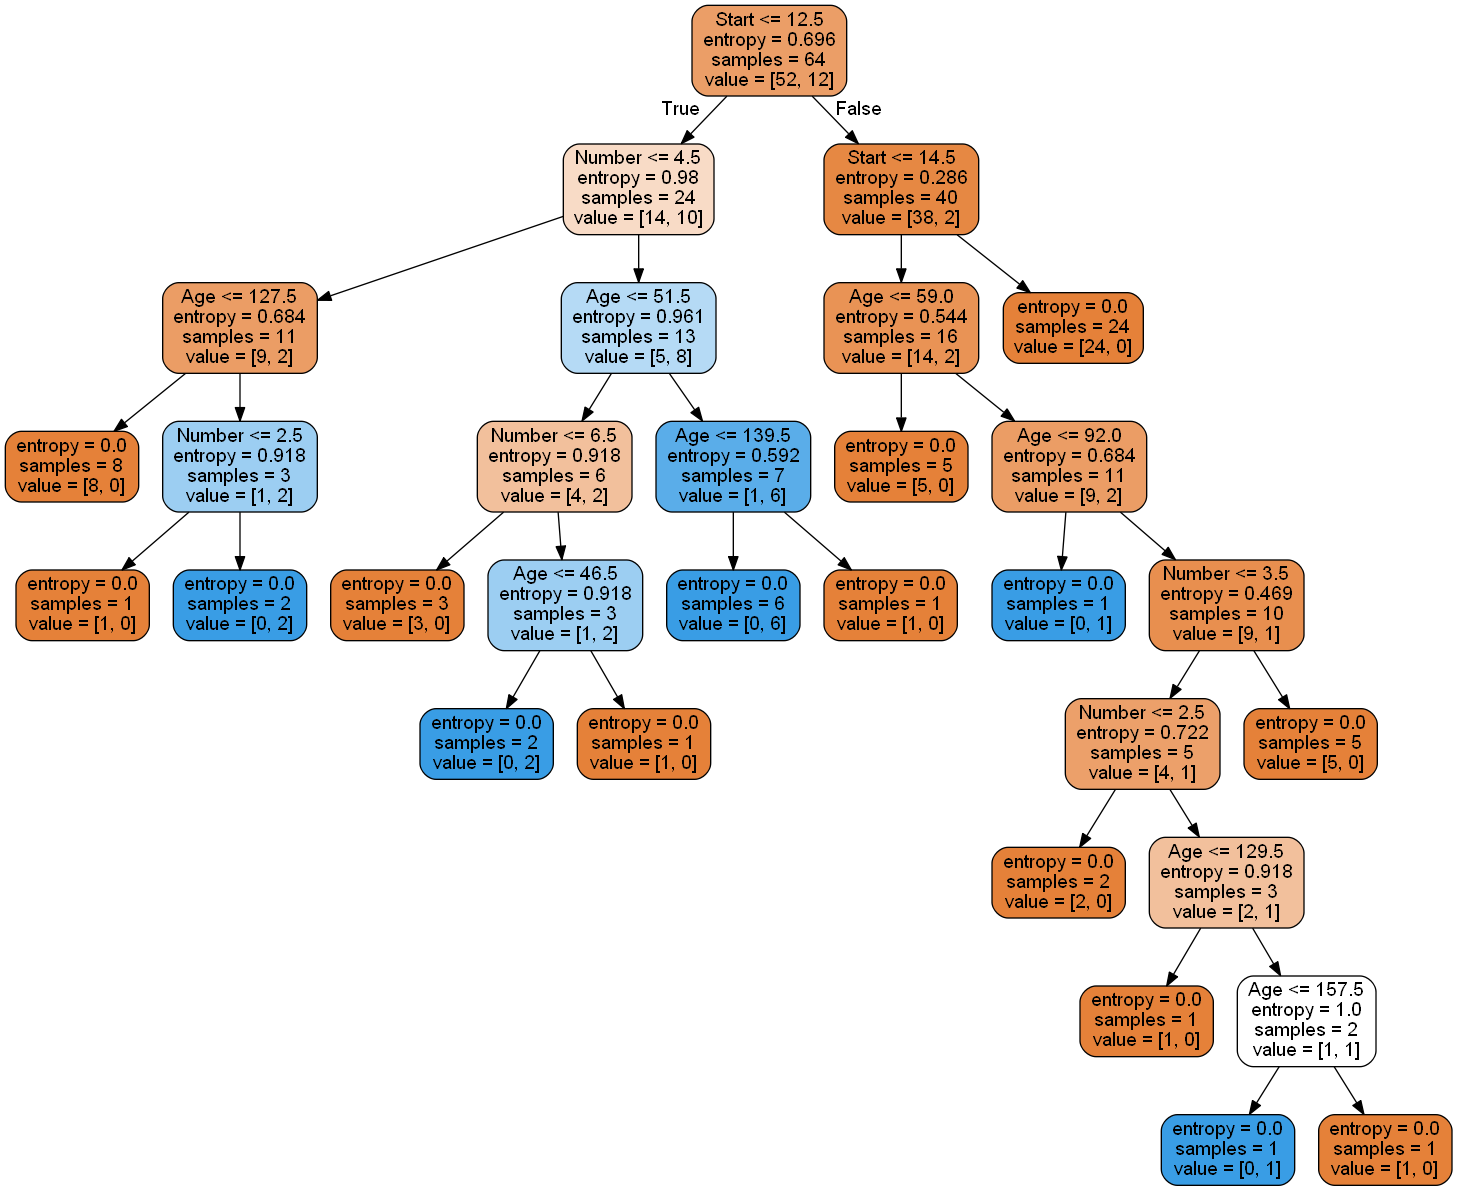

In [19]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())